In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [264]:
data = pd.read_csv('data.csv',index_col=0)
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [265]:
data.shape

(1025, 13)

In [266]:
data.isna().sum()

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [267]:
x=data.drop('target',1)
y=data.target

C:\Users\DELL\AppData\Local\Temp\ipykernel_2124\2007198222.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=data.drop('target',1)


In [268]:
y.value_counts()

1    526
0    499
Name: target, dtype: int64

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [270]:
x.columns

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [271]:
num_cols = [ 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak','slope','ca','thal']
cat_cols = ['sex', 'fbs', 'exang']

In [272]:
ct = ColumnTransformer([
    ('s1', RobustScaler(), num_cols),
    ('s2', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [273]:
p = Pipeline([
    ('ct', ct),
    ('mod', LogisticRegression(random_state=0))
])

In [274]:
p.fit(x_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['cp', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak',
                                                   'slope', 'ca', 'thal']),
                                                 ('s2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['sex', 'fbs', 'exang'])])),
                ('mod', LogisticRegression(random_state=0))])

In [275]:
# predictions are for the default threshold of 0.5
preds = p.predict(x_test)
preds[:15]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [276]:
# real class labels of the first 15 people in the test set
np.array(y_test)[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [277]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [278]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[ 76,  22],
       [  5, 102]], dtype=int64)

In [279]:
p.classes_

array([0, 1], dtype=int64)

In [280]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[102,   5],
       [ 22,  76]], dtype=int64)

In [281]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([102,   5,  22,  76], dtype=int64)

In [282]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [283]:
precision = tp/(tp+fp)
precision

0.8225806451612904

In [284]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [285]:
precision_score(y_test, preds)

0.8225806451612904

In [286]:
recall_score(y_test, preds)

0.9532710280373832

In [287]:
# harmonic mean of precision and recall
f1_score(y_test, preds)

0.8831168831168831

In [288]:
# Precision more weight than recall (beta < 1)
fbeta_score(y_test, preds, beta=0.5)

0.845771144278607

In [289]:
# recall more weight than precision (beta > 1)
fbeta_score(y_test, preds, beta=2)

0.9239130434782609

In [290]:
# when both classes need to be predicted with good accuracies, MCC is better than F-measures
matthews_corrcoef(y_test, preds)

0.7446441031043516

In [291]:
from sklearn.metrics import SCORERS

In [292]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [293]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


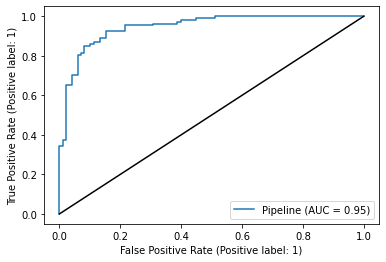

In [294]:
plot_roc_curve(p, x_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [295]:
y_test.value_counts()

1    107
0     98
Name: target, dtype: int64

In [296]:
98/(107+98)

0.47804878048780486

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


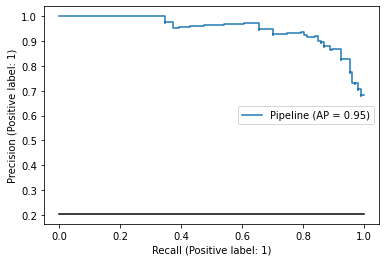

In [297]:
plot_precision_recall_curve(p, X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')

In [298]:
probs = p.predict_proba(x_test)[:, 1]
probs

array([8.59472737e-01, 7.91276923e-01, 9.02132376e-03, 9.27824373e-01,
       1.17326024e-02, 2.75416899e-02, 2.21637893e-01, 1.21669493e-02,
       4.68518623e-02, 6.56091611e-01, 5.43090502e-01, 7.48235776e-04,
       7.26357990e-01, 5.19729890e-01, 9.08361488e-01, 9.74388835e-01,
       9.63316492e-01, 5.12578921e-03, 9.89860762e-01, 2.30394503e-01,
       9.05161255e-01, 8.91378811e-01, 7.75051864e-01, 8.91378811e-01,
       9.74388835e-01, 9.47174643e-01, 9.74968004e-01, 6.72913600e-01,
       9.82323063e-01, 9.92941906e-01, 9.89410649e-01, 1.21669493e-02,
       4.42095434e-02, 8.04453710e-01, 1.39406640e-01, 5.46237903e-03,
       5.17017555e-01, 2.80183695e-01, 8.06910406e-01, 8.23115323e-01,
       9.33766815e-01, 7.83173939e-01, 9.04954600e-01, 9.57819050e-01,
       9.45044357e-01, 9.68272375e-01, 9.39709208e-01, 6.93061088e-01,
       4.06690899e-03, 6.02116601e-01, 3.54565062e-01, 6.39998838e-02,
       5.00152467e-01, 6.74236716e-01, 8.83045813e-03, 7.97974121e-02,
      

In [299]:
p.classes_


array([0, 1], dtype=int64)

In [300]:
from sklearn.preprocessing import Binarizer

In [301]:
binarizer = Binarizer(threshold=0.9)

In [302]:
s = binarizer.fit_transform([probs])
s

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.]])

In [303]:
np.unique(s.ravel(), return_counts=True)

(array([0., 1.]), array([155,  50], dtype=int64))

In [304]:
binarizer = Binarizer(threshold=0.1)

In [305]:
s = binarizer.fit_transform([probs])
s

array([[1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

In [306]:
np.unique(s.ravel(), return_counts=True)

(array([0., 1.]), array([ 56, 149], dtype=int64))

In [307]:
fpr, tpr, thr = roc_curve(y_test, probs)

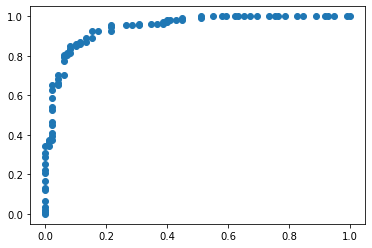

In [308]:
plt.scatter(fpr, tpr)

In [309]:
sorted(probs)

[0.0007482357758537027,
 0.002140190998509468,
 0.002140190998509468,
 0.002140190998509468,
 0.002140190998509468,
 0.0030708377765750784,
 0.0030708377765750784,
 0.004066908991650354,
 0.005125789211665562,
 0.005125789211665562,
 0.005125789211665562,
 0.005462379028738237,
 0.006238466563123294,
 0.007194262531239309,
 0.008114305582606179,
 0.008830458129051618,
 0.008830458129051618,
 0.009021323762787296,
 0.009872267649267973,
 0.0109395015233151,
 0.011516785887858247,
 0.01173260240406669,
 0.01173260240406669,
 0.011812233669707167,
 0.012166949326169508,
 0.012166949326169508,
 0.01662675814561234,
 0.016742778474279966,
 0.017520733233758655,
 0.01800640338179481,
 0.018284731608206484,
 0.018284731608206484,
 0.020159491568975896,
 0.025458018075190894,
 0.026132784874380043,
 0.026132784874380043,
 0.026711075551278312,
 0.02754168989645398,
 0.02754168989645398,
 0.02754168989645398,
 0.04373903600469517,
 0.044209543386727584,
 0.044209543386727584,
 0.044209543386727

In [310]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [311]:
roc_auc_score(y_test, probs)

0.9466908258630554

In [312]:
average_precision_score(y_test, probs)

0.9492711005081176

In [313]:
def plot_roc_curve_from_scratch(y_true, thresholds):
    xax, yax = [], []
    for thr in thresholds:
        preds = Binarizer(threshold=thr).fit_transform([probs]).ravel()
        tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        
        fpr1 = fp/(fp+tn)
        tpr1 = tp/(tp+fn)
        
        xax.append(fpr1)
        yax.append(tpr1)
    return xax, yax

In [314]:
xax, yax = plot_roc_curve_from_scratch(y_test, np.linspace(0,1,30))

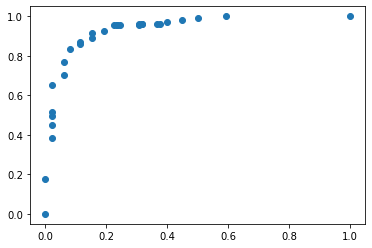

In [315]:
plt.scatter(xax, yax)

In [316]:
def plot_pr_curve_curve_from_scratch(y_true, thresholds):
    xax_pr, yax_pr = [], []
    for thr in thresholds:
        preds = Binarizer(threshold=thr).fit_transform([probs]).ravel()
        tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
        
        precision = tp/(fp+tp)
        recall = tp/(tp+fn)
        
        xax_pr.append(recall)
        yax_pr.append(precision)
    return xax_pr, yax_pr

In [317]:
xax_pr, yax_pr = plot_pr_curve_curve_from_scratch(y_test, [0.1,0.2,0.3,0.4,0.5,0.6])

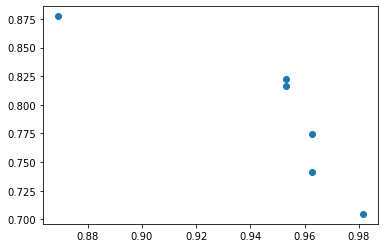

In [318]:
plt.scatter(xax_pr, yax_pr)

In [319]:
import pandas as pd

In [320]:
data = pd.read_csv('data.csv')

In [321]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [322]:
#Dropping duplicated values

data = data.drop_duplicates()

In [323]:
cate_val=[] #To store categorical columns
cont_val=[] #To strore Numerical Columns

for column in data.columns:
  if data[column].nunique()<=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [324]:
print(cate_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


In [325]:
print(cont_val)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [326]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [327]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns=cate_val,drop_first=True)

In [328]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [329]:
from sklearn.preprocessing import StandardScaler

In [330]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [331]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [332]:
x=data.drop('target',axis =1)

In [333]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [334]:
y=data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [335]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [336]:
from sklearn.linear_model import LogisticRegression

In [337]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [338]:
y_pred1 = log.predict(x_test)

In [339]:
from sklearn.metrics import accuracy_score

In [340]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [341]:
from sklearn import svm

In [342]:
svm = svm.SVC()

In [343]:
svm.fit(x_train,y_train)

SVC()

In [344]:
y_pred2 = svm.predict(x_test)

In [345]:
accuracy_score(y_test,y_pred2)

0.7540983606557377

In [346]:
from sklearn.neighbors import KNeighborsClassifier

In [347]:
knn = KNeighborsClassifier()

In [348]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [349]:
y_pred3 = knn.predict(x_test)

In [350]:
accuracy_score(y_test,y_pred3)

0.7704918032786885

In [351]:
score=[]

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

In [352]:
import matplotlib.pyplot as plt

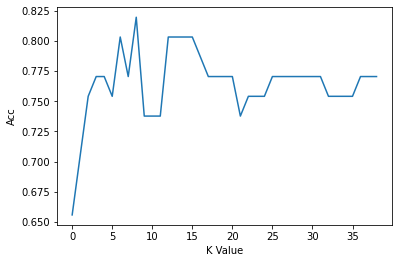

In [353]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [354]:
data = pd.read_csv('data.csv')

In [355]:
data = data.drop_duplicates()

In [356]:
data.shape

(302, 14)

In [357]:
x=data.drop('target',axis=1)
y=data['target']

In [358]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [359]:
from sklearn.tree import DecisionTreeClassifier

In [360]:
dt = DecisionTreeClassifier()

In [361]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [362]:
y_pred4 = dt.predict(x_test)

In [363]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [364]:
from sklearn.ensemble import RandomForestClassifier

In [365]:
rf = RandomForestClassifier()


In [366]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [367]:
y_pred5 = rf.predict(x_test)

In [368]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [369]:
from sklearn.ensemble import GradientBoostingClassifier

In [370]:
gbc = GradientBoostingClassifier()

In [371]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [372]:
y_pred6 = gbc.predict(x_test)

In [373]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [374]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],"ACC":[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [375]:
final_data

,Models,ACC
0,LR,0.540984
1,SVM,0.508197
2,KNN,0.524590
3,DT,0.786885
4,RF,0.836066
5,GB,0.803279


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

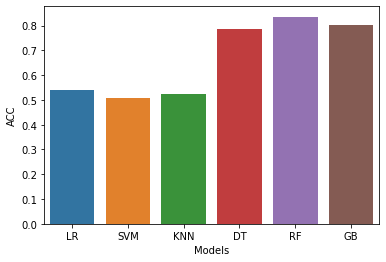

In [376]:
import seaborn as sns

sns.barplot(final_data['Models'],final_data["ACC"])

In [377]:
x = data.drop('target',axis=1)
y=data['target']

In [378]:
x.shape

(302, 13)

In [379]:
from sklearn.ensemble import RandomForestClassifier

In [380]:
rf = RandomForestClassifier()

In [381]:
rf.fit(x,y)

RandomForestClassifier()

In [382]:
import pandas as pd

In [383]:
new_data = pd.DataFrame({"age":52,'sex':1,'cp':0,'trestbps':125,'chol':212,'fbs':0,'restecg':1,'thalach':168,'exang':0,'oldpeak':1.0,'slope':2,'ca':2,'thal':3},index=[0])

In [384]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [385]:
p = rf.predict(new_data)

if p[0]==0:
  print("Patient is not suffering from any Heart Disease")

else:
  print("Patient is suffering from Heart Disease")

Patient is not suffering from any Heart Disease


In [386]:
import joblib

In [387]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [388]:
model = joblib.load('model_joblib_heart')

In [389]:
model.predict(new_data)

array([0], dtype=int64)

In [390]:
from tkinter import *
import joblib

In [391]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")
master.config(padx=50,pady=50)#use for padding


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "red", fg = "#FFB6C1"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
